In [ ]:
import numpy as np
import pandas as pd
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.utils import resample
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from PIL import Image
from sklearn.preprocessing import StandardScaler

In [ ]:
# Dataset Import
data=pd.read_csv("/content/Rainfall.csv")

In [ ]:
print(type(data))

<class 'pandas.core.frame.DataFrame'>


In [ ]:
# checking the size of the data
data.shape

(366, 12)

In [ ]:
data.head()

,day,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,rainfall,sunshine,winddirection,windspeed
0,1,1025.9,19.9,18.3,16.8,13.1,72,49,yes,9.3,80.0,26.3
1,2,1022.0,21.7,18.9,17.2,15.6,81,83,yes,0.6,50.0,15.3
2,3,1019.7,20.3,19.3,18.0,18.4,95,91,yes,0.0,40.0,14.2
3,4,1018.9,22.3,20.6,19.1,18.8,90,88,yes,1.0,50.0,16.9
4,5,1015.9,21.3,20.7,20.2,19.9,95,81,yes,0.0,40.0,13.7


In [ ]:
data["day"].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31])

In [ ]:
print("Data Info: ")
data.info()

Data Info: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   day                     366 non-null    int64  
 1   pressure                366 non-null    float64
 2   maxtemp                 366 non-null    float64
 3   temparature             366 non-null    float64
 4   mintemp                 366 non-null    float64
 5   dewpoint                366 non-null    float64
 6   humidity                366 non-null    int64  
 7   cloud                   366 non-null    int64  
 8   rainfall                366 non-null    object 
 9   sunshine                366 non-null    float64
 10           winddirection  365 non-null    float64
 11  windspeed               365 non-null    float64
dtypes: float64(8), int64(3), object(1)
memory usage: 34.4+ KB


In [ ]:
data.columns

Index(['day', 'pressure ', 'maxtemp', 'temparature', 'mintemp', 'dewpoint',
       'humidity ', 'cloud ', 'rainfall', 'sunshine', '         winddirection',
       'windspeed'],
      dtype='object')

In [ ]:
# Remove the extra spaces from all columns
data.columns=data.columns.str.strip()

In [ ]:
data.columns

Index(['day', 'pressure', 'maxtemp', 'temparature', 'mintemp', 'dewpoint',
       'humidity', 'cloud', 'rainfall', 'sunshine', 'winddirection',
       'windspeed'],
      dtype='object')

In [ ]:
data=data.drop(columns=["day"])

In [ ]:
data.head()

,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,rainfall,sunshine,winddirection,windspeed
0,1025.9,19.9,18.3,16.8,13.1,72,49,yes,9.3,80.0,26.3
1,1022.0,21.7,18.9,17.2,15.6,81,83,yes,0.6,50.0,15.3
2,1019.7,20.3,19.3,18.0,18.4,95,91,yes,0.0,40.0,14.2
3,1018.9,22.3,20.6,19.1,18.8,90,88,yes,1.0,50.0,16.9
4,1015.9,21.3,20.7,20.2,19.9,95,81,yes,0.0,40.0,13.7


In [ ]:
print("Checking Null Values: ")
print(data.isnull().sum())

Checking Null Values: 
pressure         0
maxtemp          0
temparature      0
mintemp          0
dewpoint         0
humidity         0
cloud            0
rainfall         0
sunshine         0
winddirection    1
windspeed        1
dtype: int64


In [ ]:
data["winddirection"].unique()

array([ 80.,  50.,  40.,  20.,  30.,  60.,  70.,  10., 200., 220., 120.,
       190., 210., 300., 240., 180., 230.,  90., 170., 150., 100., 130.,
        nan, 160., 270., 280., 250., 260., 290., 350., 110., 140.])

In [ ]:
sum(data["winddirection"].unique())

nan

In [ ]:
# Now handles the missing values
data["winddirection"]=data["winddirection"].fillna(data["winddirection"].mode()[0])
data["windspeed"]=data["windspeed"].fillna(data["windspeed"].mean())

In [ ]:
print("Checking Null Values: ")
print(data.isnull().sum())

Checking Null Values: 
pressure         0
maxtemp          0
temparature      0
mintemp          0
dewpoint         0
humidity         0
cloud            0
rainfall         0
sunshine         0
winddirection    0
windspeed        0
dtype: int64


In [ ]:
data["rainfall"].unique()

array(['yes', 'no'], dtype=object)

In [ ]:
# Plot the data
sns.set(style='whitegrid')

In [ ]:
data.describe()

,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,sunshine,winddirection,windspeed
count,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000
mean,1013.742623,26.191257,23.747268,21.894536,19.989071,80.177596,71.128415,4.419399,101.284153,21.536986
std,6.414776,5.978343,5.632813,5.594153,5.997021,10.062470,21.798012,3.934398,81.722827,10.055908
min,998.500000,7.100000,4.900000,3.100000,-0.400000,36.000000,0.000000,0.000000,10.000000,4.400000
25%,1008.500000,21.200000,18.825000,17.125000,16.125000,75.000000,58.000000,0.500000,40.000000,13.725000
50%,1013.000000,27.750000,25.450000,23.700000,21.950000,80.500000,80.000000,3.500000,70.000000,20.500000
75%,1018.100000,31.200000,28.600000,26.575000,25.000000,87.000000,88.000000,8.200000,190.000000,27.825000
max,1034.600000,36.300000,32.400000,30.000000,26.700000,98.000000,100.000000,12.100000,350.000000,59.500000


In [ ]:
data.columns

Index(['pressure', 'maxtemp', 'temparature', 'mintemp', 'dewpoint', 'humidity',
       'cloud', 'rainfall', 'sunshine', 'winddirection', 'windspeed'],
      dtype='object')

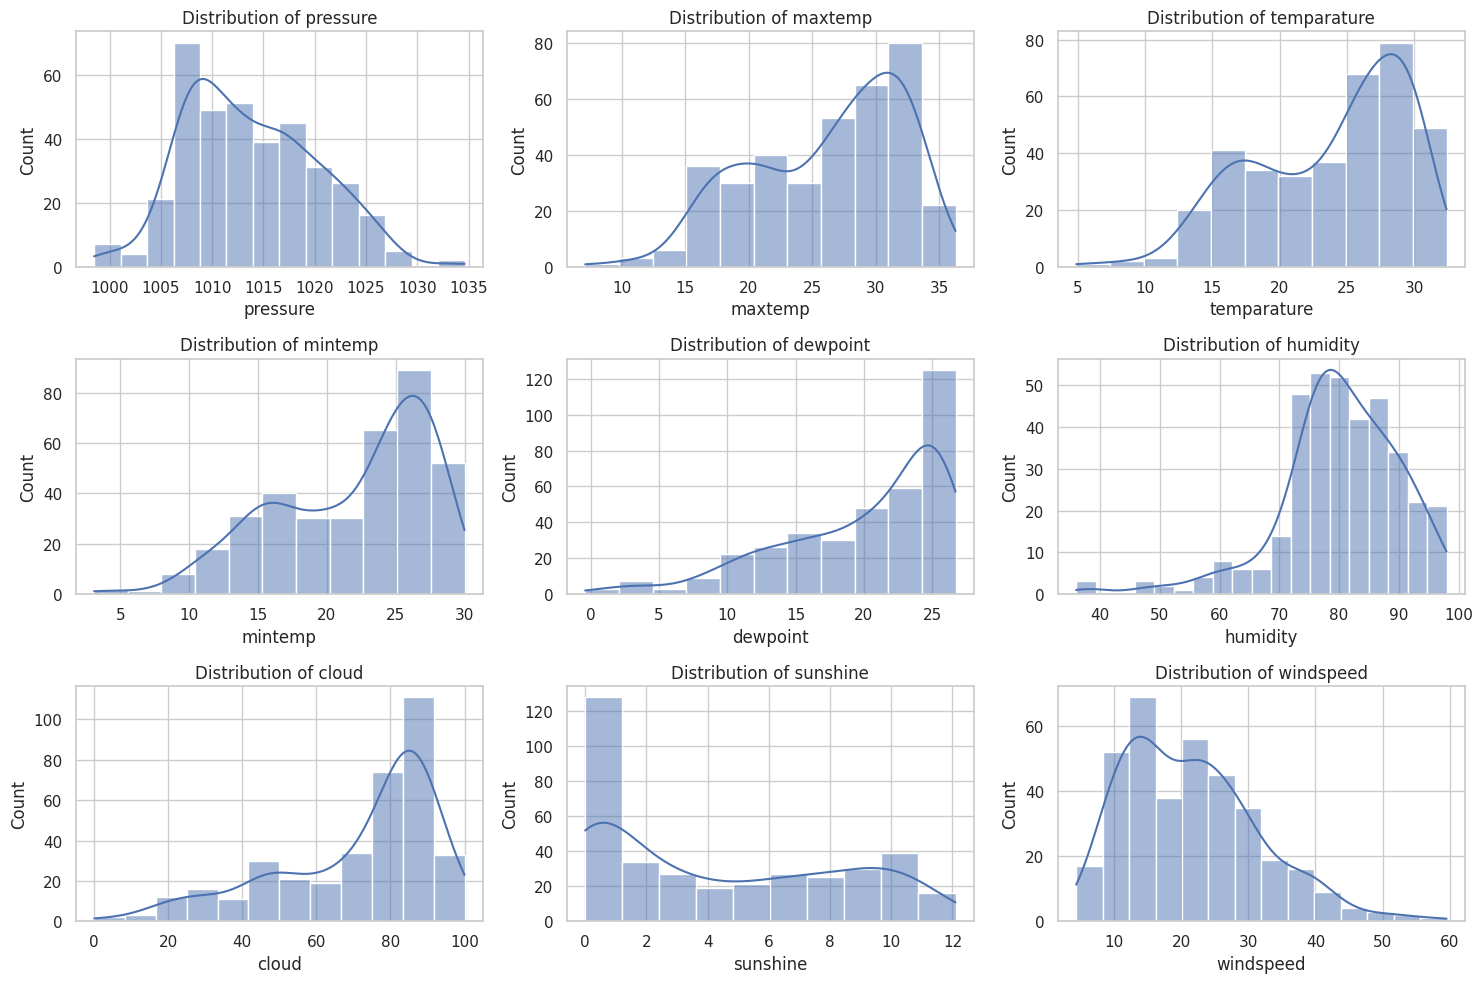

In [ ]:
plt.figure(figsize=(15, 10))

for i, column in enumerate(['pressure', 'maxtemp', 'temparature', 'mintemp', 'dewpoint', 'humidity','cloud', 'sunshine', 'windspeed'], 1):
  plt.subplot(3, 3, i)
  sns.histplot(data[column], kde=True)
  plt.title(f"Distribution of {column}")

plt.tight_layout()
plt.show()

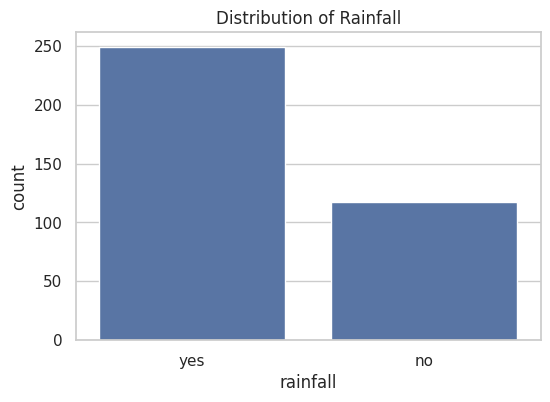

In [ ]:
plt.figure(figsize=(6,4))
sns.countplot(x="rainfall", data=data)
plt.title("Distribution of Rainfall")
plt.show()

In [ ]:
# Convert the yes and nos to 1 & 0
data["rainfall"]=data["rainfall"].map({'yes':1,'no':0})

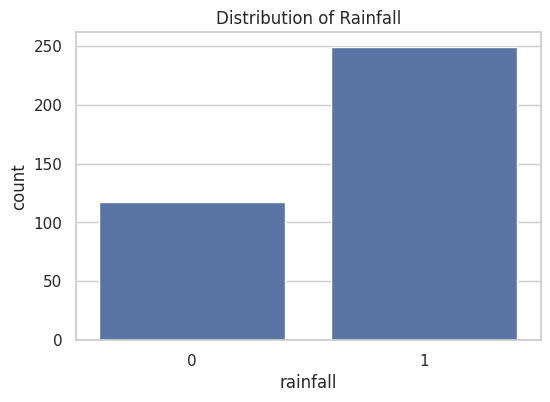

In [ ]:
plt.figure(figsize=(6,4))
sns.countplot(x="rainfall", data=data)
plt.title("Distribution of Rainfall")
plt.show()

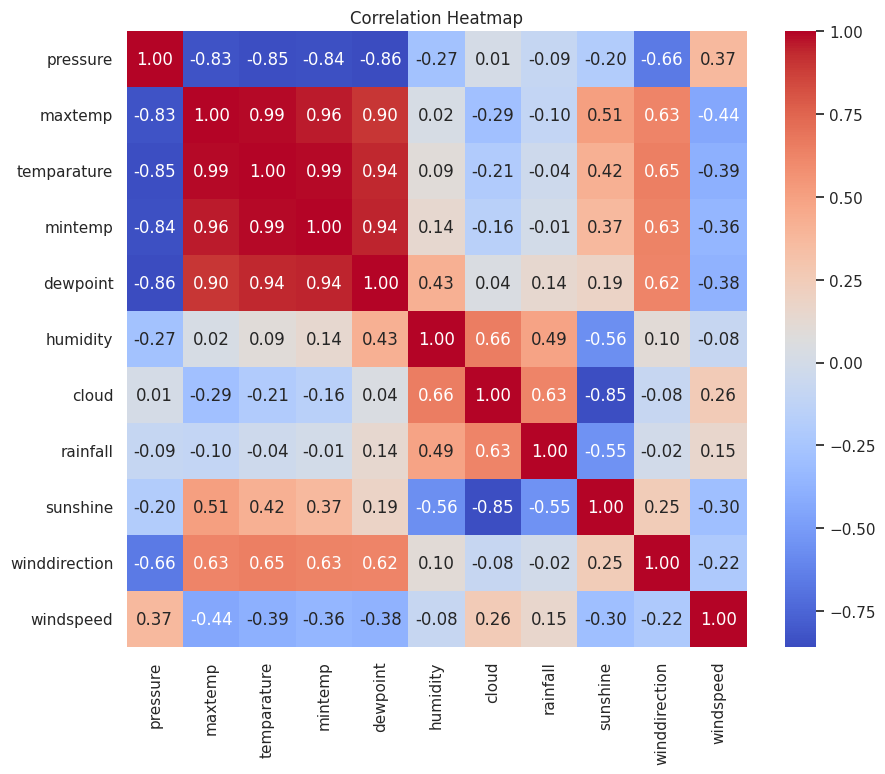

In [ ]:
# Correlation Matrix
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

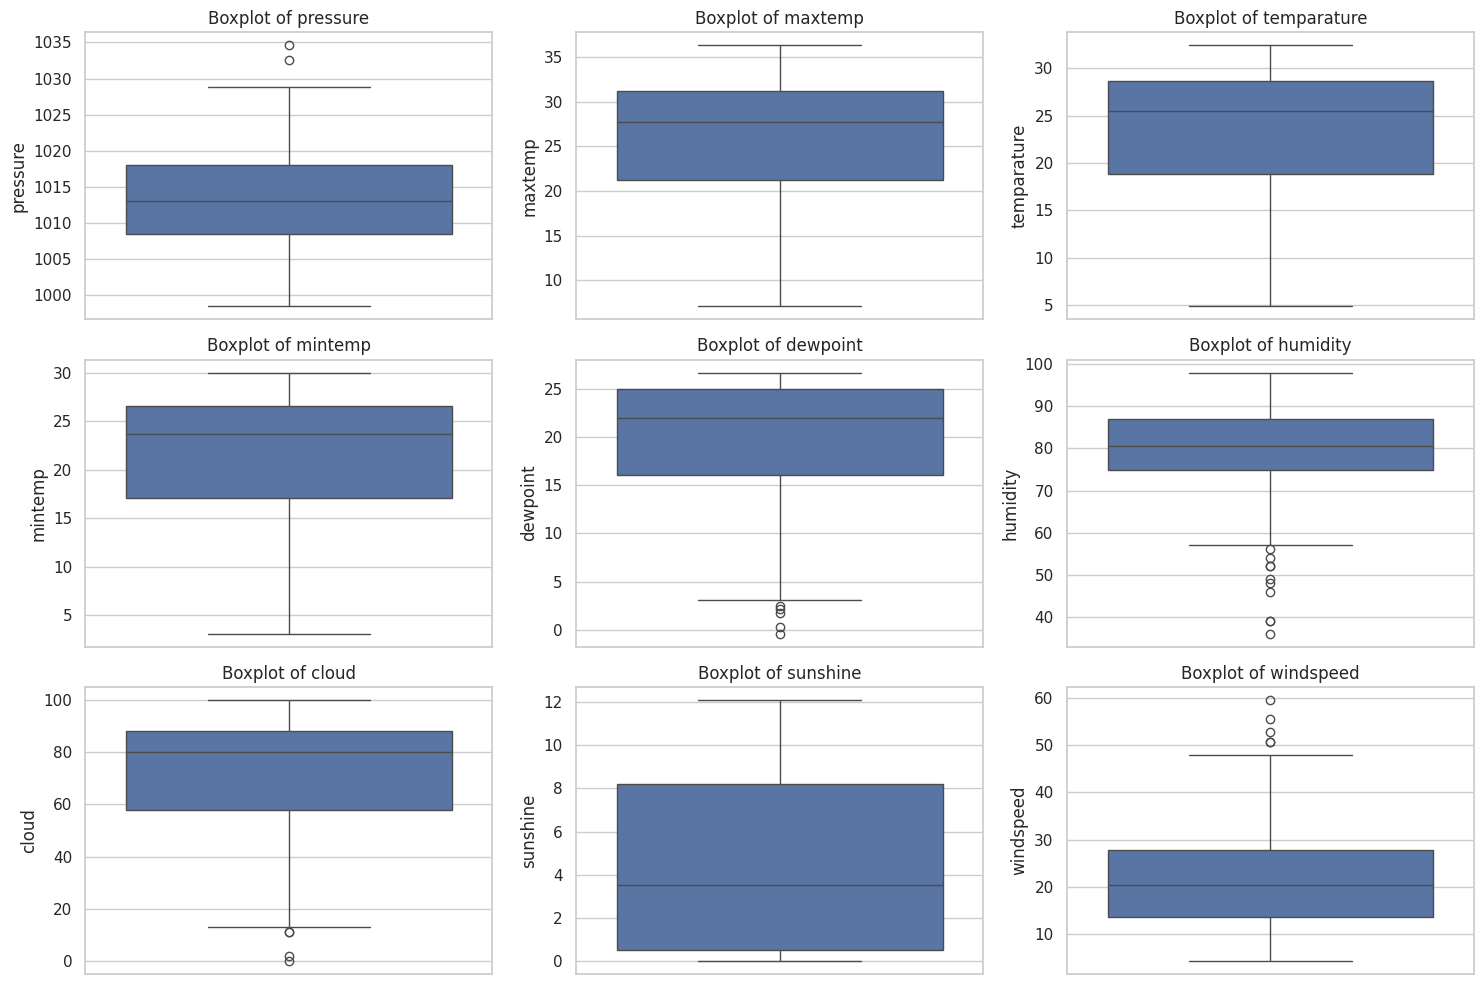

In [ ]:
plt.figure(figsize=(15, 10))

for i, column in enumerate(['pressure', 'maxtemp', 'temparature', 'mintemp', 'dewpoint', 'humidity','cloud', 'sunshine', 'windspeed'], 1):
  plt.subplot(3, 3, i)
  sns.boxplot(data[column])
  plt.title(f"Boxplot of {column}")

plt.tight_layout()
plt.show()

In [ ]:
data=data.drop(columns=['maxtemp','mintemp','temparature'])

In [ ]:
data.head()

,pressure,dewpoint,humidity,cloud,rainfall,sunshine,winddirection,windspeed
0,1025.9,13.1,72,49,1,9.3,80.0,26.3
1,1022.0,15.6,81,83,1,0.6,50.0,15.3
2,1019.7,18.4,95,91,1,0.0,40.0,14.2
3,1018.9,18.8,90,88,1,1.0,50.0,16.9
4,1015.9,19.9,95,81,1,0.0,40.0,13.7


In [ ]:
print(data['rainfall'].value_counts())

rainfall
1    249
0    117
Name: count, dtype: int64


In [ ]:
# Majority and Minority Class
d_major=data[data["rainfall"]==1]
d_minor=data[data["rainfall"]==0]

In [ ]:
print(d_major.shape)
print(d_minor.shape)

(249, 8)
(117, 8)


In [ ]:
# Number of Majority is higher than the number of minority so we need to downsample the majority
d_major_down=resample(d_major,replace=False,n_samples=len(d_minor),random_state=69)

In [ ]:
print(d_major.shape)
print(d_major_down.shape)
print(d_minor.shape)

(249, 8)
(117, 8)
(117, 8)


In [ ]:
d_down=pd.concat([d_major_down,d_minor])
print(d_down.shape)
d_down.head()

(234, 8)


,pressure,dewpoint,humidity,cloud,rainfall,sunshine,winddirection,windspeed
102,1009.1,19.3,94,88,1,0.0,70.0,29.8
183,1009.1,26.0,82,86,1,2.7,200.0,21.9
84,1023.9,9.2,75,88,1,0.2,20.0,19.4
88,1021.4,9.6,59,74,1,2.4,50.0,20.5
244,1007.8,25.4,89,87,1,0.4,50.0,8.6


In [ ]:
# Shuffle
d_down=d_down.sample(frac=1,random_state=69).reset_index(drop=True)
d_down.head()

,pressure,dewpoint,humidity,cloud,rainfall,sunshine,winddirection,windspeed
0,1010.4,23.0,84,78,1,4.6,50.0,12.5
1,1015.3,18.9,86,83,0,6.1,50.0,4.5
2,1007.8,22.7,77,63,0,5.6,20.0,11.3
3,1015.6,22.1,77,48,0,9.5,60.0,10.3
4,1016.7,21.2,78,47,0,7.7,90.0,19.6


In [ ]:
d_down["rainfall"].value_counts()

,count
rainfall,
1,117
0,117


In [ ]:
# Splits X & Y
X=d_down.drop(columns=["rainfall"])
y=d_down["rainfall"]
print(X)
print(y)

     pressure  dewpoint  humidity  cloud  sunshine  winddirection  windspeed
0      1010.4      23.0        84     78       4.6           50.0       12.5
1      1015.3      18.9        86     83       6.1           50.0        4.5
2      1007.8      22.7        77     63       5.6           20.0       11.3
3      1015.6      22.1        77     48       9.5           60.0       10.3
4      1016.7      21.2        78     47       7.7           90.0       19.6
..        ...       ...       ...    ...       ...            ...        ...
229    1015.9      19.9        95     81       0.0           40.0       13.7
230    1024.1       8.9        77     91       0.0           20.0       19.2
231    1005.6      20.0        56     53      10.4          230.0       15.5
232    1017.4      20.1        75     51       7.4           70.0       23.9
233    1021.9      11.8        89     95       0.0           40.0       18.6

[234 rows x 7 columns]
0      1
1      0
2      0
3      0
4      0
      .

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.22,random_state=69)

Model Training


In [ ]:
Random_Forest_Model=RandomForestClassifier(random_state=69)

parameter_grid_random_forest={
    'n_estimators':[50,100,200],
    'max_features':['sqrt','log2'],
    'max_depth':[None,10,20,30],
    'min_samples_split':[2,5,10],
    'min_samples_leaf':[1,2,4]
}

In [ ]:
# Making a function to return predictions of multiple days
scaler=StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
Mmodel=Random_Forest_Model.fit(X_train,y_train)
def predict_rainfall_array(data_array):

  data_scaled=scaler.transform(data_array)
  predictions=Mmodel.predict(data.scaled)

  for i,prediction in enumerate(predictons):
    print(f"Day {i + 1} Prediction: {'Rainfall' if prediction == 1 else 'No Rainfall'}")

    img=Image.open("/content/Rainfall.png") if prediction == 1 else Image.open("/content/No Rainfall.png")
    display(img)

In [ ]:
# Hypertune the Grid Search
grid_search_random_forest=GridSearchCV(estimator=Random_Forest_Model,param_grid=parameter_grid_random_forest,cv=5,n_jobs=-1,verbose=2)
grid_search_random_forest.fit(X_train,y_train)

Fitting 5 folds for each of 216 candidates, totalling 1080 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=69), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20, 30],
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]},
             verbose=2)

In [ ]:
Best_Random_Forest_Model=grid_search_random_forest.best_estimator_
print("Best Parameters are: ",grid_search_random_forest.best_params_)

Best Parameters are:  {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}


Model Evaluation

In [ ]:
CV_scores=cross_val_score(Best_Random_Forest_Model,X_train,y_train,cv=5)
print("CV Scores: ",CV_scores)
print("Mean CV Score: ",CV_scores.mean())

CV Scores:  [0.64864865 0.7027027  0.77777778 0.75       0.83333333]
Mean CV Score:  0.7424924924924925


In [ ]:
# Test
y_pred=Best_Random_Forest_Model.predict(X_test)

print("Test Accuracy: ",accuracy_score(y_test,y_pred))
print("Test Confusion Matrix: ",confusion_matrix(y_test,y_pred))
print("Classification Report: ",classification_report(y_test,y_pred))

Test Accuracy:  0.8269230769230769
Test Confusion Matrix:  [[21  4]
 [ 5 22]]
Classification Report:                precision    recall  f1-score   support

           0       0.81      0.84      0.82        25
           1       0.85      0.81      0.83        27

    accuracy                           0.83        52
   macro avg       0.83      0.83      0.83        52
weighted avg       0.83      0.83      0.83        52



In [ ]:
input_data = (1015.9, 19.9, 95, 81, 0.0, 40.0, 13.7)
input_Data_Frame=pd.DataFrame([input_data],columns=['pressure', 'dewpoint', 'humidity', 'cloud', 'sunshine','winddirection', 'windspeed'])

input_Data_Frame


,pressure,dewpoint,humidity,cloud,sunshine,winddirection,windspeed
0,1015.9,19.9,95,81,0.0,40.0,13.7


In [ ]:
prediction=Best_Random_Forest_Model.predict(input_Data_Frame)
print(prediction)

[1]


In [ ]:
prediction[0]

1

In [ ]:
print("Prediction Result: ","Rainfall" if prediction[0]==1 else "No Rainfall")

Prediction Result:  Rainfall


In [ ]:
Model_Data={"model": Best_Random_Forest_Model, "feature_names": X.columns.tolist()}

with open("Rainfall Prediction Model.pkl", "wb") as file:
  pickle.dump(Model_Data, file)

Loading the the saved model and utilize it for prediction

In [ ]:
# Loading the trained Model

with open("Rainfall Prediction Model.pkl", "rb") as file:
  Model_Data=pickle.load(file)

In [ ]:
model=Model_Data["model"]
feature_names=Model_Data["feature_names"]

In [72]:
#input_data = (1021.8,15,79,56,3.4,30,21.5)
input_data = [
              [1015.9, 19.9, 95, 81, 0.0, 40.0, 13.7],
              [1021.8,15,79,56,3.4,30,21.5]
            ]
input_data=np.array(input_data)
Input_Data_Frame=pd.DataFrame(input_data,columns=feature_names)
Input_Data_Frame

,pressure,dewpoint,humidity,cloud,sunshine,winddirection,windspeed
0,1015.9,19.9,95.0,81.0,0.0,40.0,13.7
1,1021.8,15.0,79.0,56.0,3.4,30.0,21.5


Prediction Result of Day 1:  Rainfall


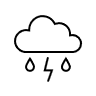

Prediction Result of Day 2:  No Rainfall


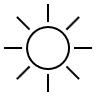

In [80]:
prediction=model.predict(Input_Data_Frame)
for i in reversed(prediction):
  print(f"Prediction Result of Day {i+1}: ","Rainfall" if prediction[i]==1 else "No Rainfall")
  img=Image.open("/content/Rainfall.png") if prediction[i]==1 else Image.open("/content/No Rainfall.png")
  display(img)
